In [1]:
import pandas as pd

# Uploading data
math = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-mat.csv", sep=",")
por  = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-por.csv", sep=",")

In [2]:
# Check shape
print(math.shape)
print(por.shape)

# Show first 5 rows
math.head()
math.tail()

(395, 33)
(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


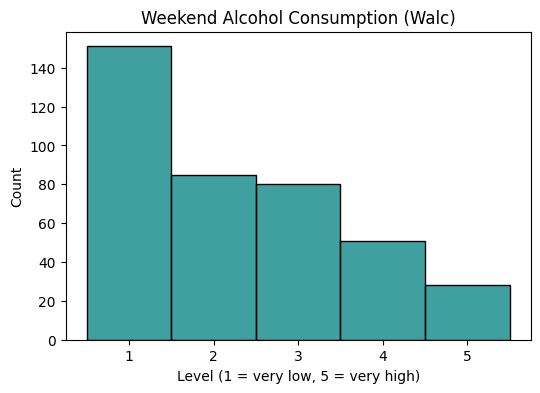

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(math["Walc"], bins=5, discrete=True, color="teal")
plt.title("Weekend Alcohol Consumption (Walc)")
plt.xlabel("Level (1 = very low, 5 = very high)")
plt.ylabel("Count")
plt.show()

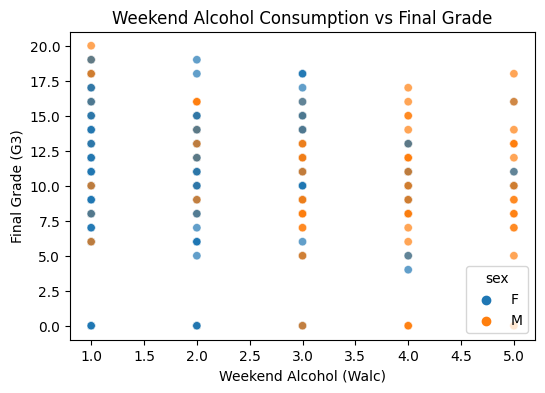

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=math, x="Walc", y="G3", hue="sex", alpha=0.7)
plt.title("Weekend Alcohol Consumption vs Final Grade")
plt.xlabel("Weekend Alcohol (Walc)")
plt.ylabel("Final Grade (G3)")
plt.show()

In [5]:
# Sex balance
print("Sex distribution:")
print(math["sex"].value_counts(normalize=True))

# Weekend alcohol levels distribution
print("\nWeekend alcohol distribution:")
print(math["Walc"].value_counts(normalize=True))

Sex distribution:
sex
F    0.526582
M    0.473418
Name: proportion, dtype: float64

Weekend alcohol distribution:
Walc
1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: proportion, dtype: float64


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


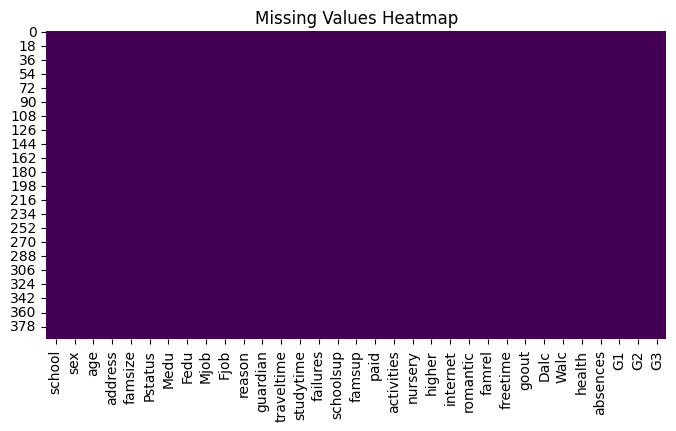

In [6]:
# Check missing data
print(math.isnull().sum())

# Visualize missing data with a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(math.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
# Check duplicate rows
duplicates = math.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [8]:
# Unique values for each column
for col in math.columns:
    print(f"{col}: {math[col].nunique()} unique values")

school: 2 unique values
sex: 2 unique values
age: 8 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Medu: 5 unique values
Fedu: 5 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
traveltime: 4 unique values
studytime: 4 unique values
failures: 4 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
famrel: 5 unique values
freetime: 5 unique values
goout: 5 unique values
Dalc: 5 unique values
Walc: 5 unique values
health: 5 unique values
absences: 34 unique values
G1: 17 unique values
G2: 17 unique values
G3: 18 unique values


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


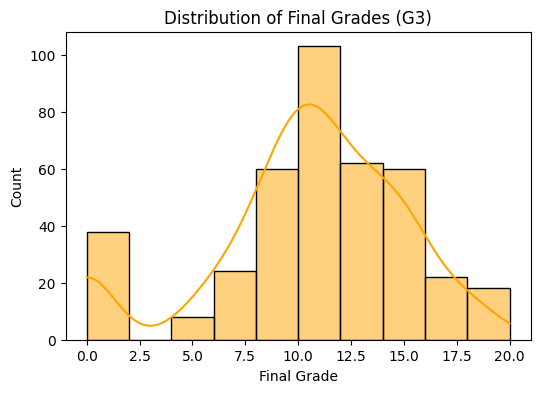

In [9]:
# Outliers detection
plt.figure(figsize=(6,4))
sns.histplot(math["G3"], bins=10, kde=True, color="orange")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


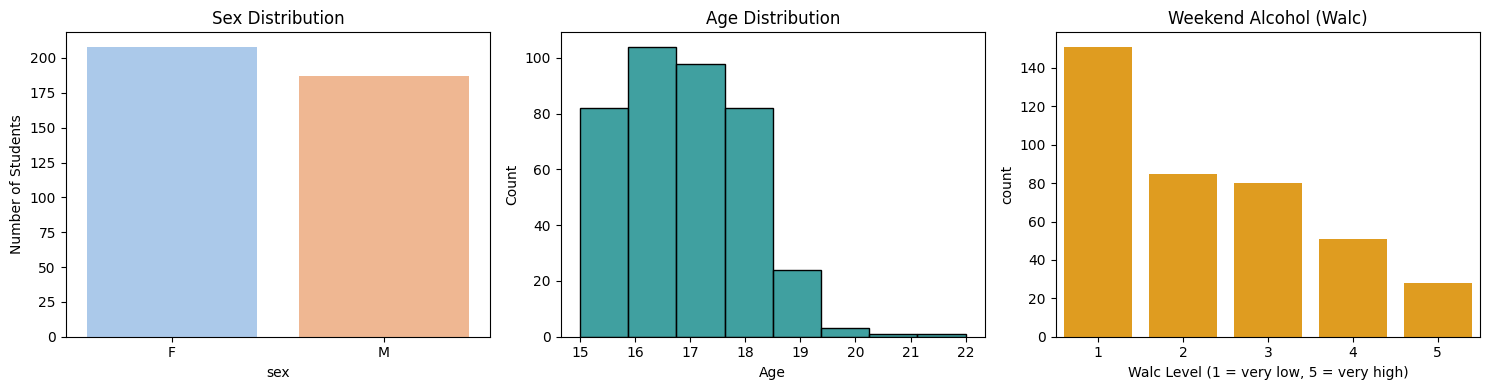

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

# Sex distribution
plt.subplot(1, 3, 1)
sns.countplot(data=math, x="sex", palette="pastel")
plt.title("Sex Distribution")
plt.ylabel("Number of Students")

# Age distribution
plt.subplot(1, 3, 2)
sns.histplot(math["age"], bins=8, kde=False, color="teal")
plt.title("Age Distribution")
plt.xlabel("Age")

# Weekend alcohol distribution
plt.subplot(1, 3, 3)
sns.countplot(data=math, x="Walc", color="orange")
plt.title("Weekend Alcohol (Walc)")
plt.xlabel("Walc Level (1 = very low, 5 = very high)")

plt.tight_layout()
plt.show()
